# Gradient Descent in Two Dimension

Contents

- Create a class which does gradient descent including plain vanilla, momentum and nesterov's accelarated gradient.
- Define the loss function to be minimised (THREE-HUMP CAMEL FUNCTION), which has three local minima and a globan minimum.
- Plain vanilla gradient descent
- Momentum
- NAG

Sources: Alan Chalk, https://github.com/alanchalk/aml_2019_gd/blob/master/gd.py


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
class gd_2d:
    
    def __init__(self, fn_loss, fn_grad_x, fn_grad_y):
        self.fn_loss = fn_loss
        self.fn_grad_x = fn_grad_x
        self.fn_grad_y = fn_grad_y
        
    def pv(self, x_init, y_init, n_iter, eta, tol):
        x = x_init
        y = y_init
        
        loss_path = []
        x_path = []
        y_path = []
        
        x_path.append(x)
        y_path.append(y)
        loss_this = self.fn_loss(x,y)
        loss_path.append(loss_this)
        g_x = self.fn_grad_x(x,y)
        g_y = self.fn_grad_y(x,y)

        for i in range(n_iter):
            if np.abs(g_x) < tol and np.abs(g_y) < tol:
                break
            elif np.isnan(g_x) or np.isnan(g_y):
                break
            g_x = self.fn_grad_x(x,y)
            g_y = self.fn_grad_y(x,y)
            x += -eta * g_x
            y += -eta * g_y
            x_path.append(x)
            y_path.append(y)
            loss_this = self.fn_loss(x,y)
            loss_path.append(loss_this)
            
        if np.isnan(g_x) or np.isnan(g_y):
            print('Exploded')
        elif np.abs(g_x) < tol or np.abs(g_y) < tol:
            print('Converged in {} steps.  Loss fn {} achieved by x = {},y = {}'.format(i, loss_this, x,y))
        else:
            print('Did not converge')
        self.loss_path = loss_path
        self.x_path = x_path
        self.y_path = y_path

        
    def momentum(self, x_init, y_init, n_iter, eta, tol, alpha):
        x = x_init
        y = y_init
        
        loss_path = []
        x_path = []
        y_path = []
        
        x_path.append(x)
        y_path.append(y)
        loss_this = self.fn_loss(x,y)
        loss_path.append(loss_this)
        g_x = self.fn_grad_x(x,y)
        g_y = self.fn_grad_y(x,y)
        nu_x = 0
        nu_y = 0

        for i in range(n_iter):
            if np.abs(g_x) < tol and np.abs(g_y) < tol:
                break
            elif np.isnan(g_x) or np.isnan(g_y):
                break
            g_x = self.fn_grad_x(x,y)
            g_y = self.fn_grad_y(x,y)
            nu_x = alpha * nu_x + eta * g_x
            nu_y = alpha * nu_y + eta * g_y
            x += -nu_x
            y += -nu_y
            x_path.append(x)
            y_path.append(y)
            loss_this = self.fn_loss(x,y)
            loss_path.append(loss_this)

        if np.isnan(g_x) or np.isnan(g_y):
            print('Exploded')
        elif np.abs(g_x) < tol or np.abs(g_y) < tol:
            print('Converged in {} steps.  Loss fn {} achieved by x = {},y = {}'.format(i, loss_this, x,y))
        else:
            print('Did not converge')
        self.loss_path = loss_path
        self.x_path = x_path
        self.y_path = y_path

    def nag(self, x_init, y_init, n_iter, eta, tol, alpha):
        x = x_init
        y = y_init
        
        loss_path = []
        x_path = []
        y_path = []
        
        x_path.append(x)
        y_path.append(y)
        loss_this = self.fn_loss(x,y)
        loss_path.append(loss_this)
        g_x = self.fn_grad_x(x,y)
        g_y = self.fn_grad_y(x,y)
        nu_x = 0
        nu_y = 0

        for i in range(n_iter):
            mu = 1 - 3 / (i + 1 + 5) 
            g_x = self.fn_grad_x(x - mu * nu_x,y)
            g_y = self.fn_grad_y(x,y - mu * nu_y)
            if np.abs(g_x) < tol and np.abs(g_y) < tol:
                break
            elif np.isnan(g_x) or np.isnan(g_y):
                break
            nu_x = alpha * nu_x + eta * g_x
            nu_y = alpha * nu_y + eta * g_y
            x += -nu_x
            y += -nu_y
            x_path.append(x)
            y_path.append(y)
            loss_this = self.fn_loss(x,y)
            loss_path.append(loss_this)

        if np.isnan(g_x) or np.isnan(g_y):
            print('Exploded')
        elif np.abs(g_x) < tol or np.abs(g_y) < tol:
            print('Converged in {} steps.  Loss fn {} achieved by x = {},y = {}'.format(i, loss_this, x,y))
        else:
            print('Did not converge')
        self.loss_path = loss_path
        self.x_path = x_path
        self.y_path = y_path


**Test the class with the following functions (THREE-HUMP CAMEL FUNCTION).**

In [3]:
def fn_loss(x,y):
    return 2*x**2 - 1.05*x**4 + (x**6)/6 + x*y + y**2

def fn_grad_x(x,y):
    return 4*x - 4.2*x**3 + x**5 + y

def fn_grad_y(x,y):
    return x + 2*y

**Plot the surface of loss function**

The plot shows the three-hump Camel function on its recommended input domain.

Text(0.5, 0, 'y')

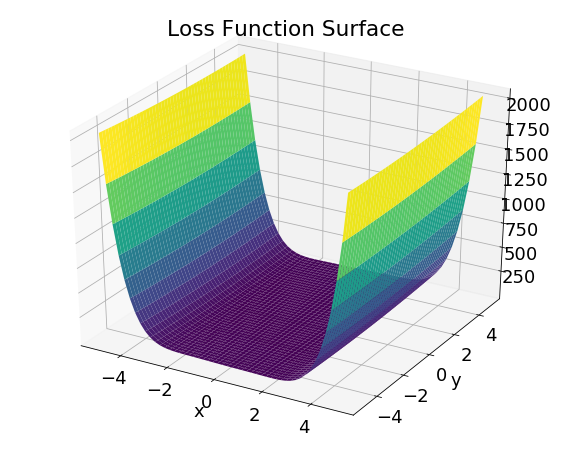

In [4]:
font = {'size': 18}
matplotlib.rc('font', **font)

x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
X,Y = np.meshgrid(x,y)
Z = fn_loss(X,Y)

fig = plt.figure(figsize=(10, 8))
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
axe.set_title('Loss Function Surface')
axe.set_xlabel('x')
axe.set_ylabel('y')


The plot below shows only a portion of this domain, to allow for easier viewing of the function's key characteristics. The function has three local minima in the range [-2,2].


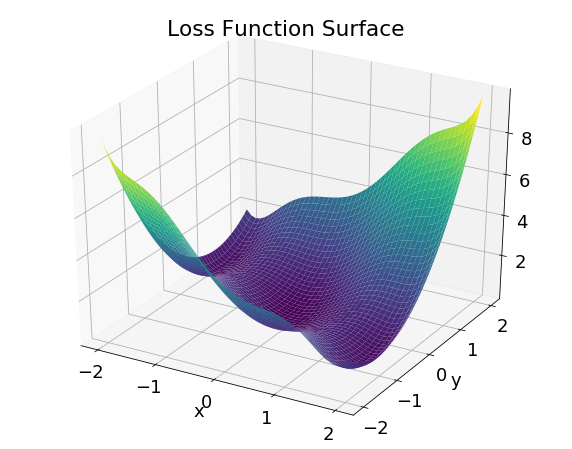

In [5]:
font = {'size': 18}
matplotlib.rc('font', **font)

x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)
Z = fn_loss(X,Y)

fig = plt.figure(figsize=(10, 8))
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
axe.set_title('Loss Function Surface')
axe.set_xlabel('x')
axe.set_ylabel('y')
plt.xticks([-2,-1,0,1,2]);
plt.yticks([-2,-1,0,1,2]);

**Plain vanilla gradient descent**

In [6]:
solver = gd_2d(fn_loss = fn_loss, fn_grad_x = fn_grad_x, fn_grad_y = fn_grad_y)

Call the pv method to find the minimum of the loss function

In [7]:
solver.pv(x_init = 1, y_init = 1, n_iter = 10000, eta = 0.001, tol = 1e-7)

Converged in 9712 steps.  Loss fn 3.672170761404549e-15 achieved by x = -2.6043163829073688e-08,y = 6.287375932441131e-08


In [8]:
solver.pv(x_init = 1, y_init = 1, n_iter = 10000, eta = 0.002, tol = 1e-7)

Converged in 4852 steps.  Loss fn 3.651788567837078e-15 achieved by x = -2.5970787643472838e-08,y = 6.269902775547683e-08


In [9]:
solver.pv(x_init = 1, y_init = 1, n_iter = 10000, eta = 0.003, tol = 1e-7)

Converged in 3232 steps.  Loss fn 3.631308437114529e-15 achieved by x = -2.589785996021718e-08,y = 6.252296475342761e-08


**Plot the path taken by plain vanilla gradient descent**

Text(0, 0.5, 'loss')

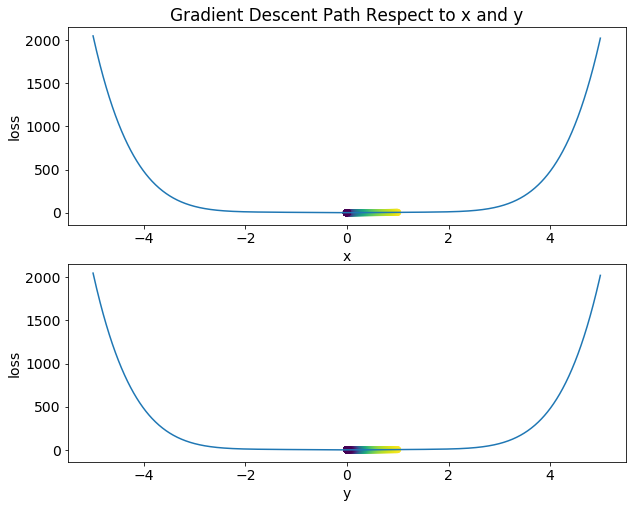

In [10]:
x_range = np.arange(-5, 5, 0.01)
y_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x_range,y_range)

font = {'size': 14}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x_range, z_range)
ax1.scatter(solver.x_path, solver.loss_path, color=colours)
ax1.set_title('Gradient Descent Path Respect to x and y')
ax1.set_xlabel('x')
ax1.set_ylabel('loss')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(y_range, z_range)
ax2.scatter(solver.y_path, solver.loss_path, color=colours)
ax2.set_xlabel('y')
ax2.set_ylabel('loss')

Text(0.5, 0.92, 'Gradient Descent Path 3D Plot')

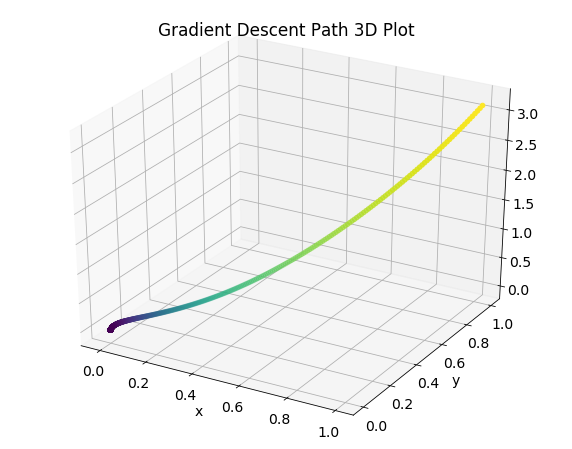

In [11]:
fig = plt.figure(figsize=(10, 8))
axl = plt.axes(projection='3d')
axl.scatter3D(solver.x_path, solver.y_path, solver.loss_path, color=colours)
axl.set_xlabel('x')
axl.set_ylabel('y')
axl.set_title('Gradient Descent Path 3D Plot')

**Momentum**

In [12]:
solver = gd_2d(fn_loss = fn_loss, fn_grad_x = fn_grad_x, fn_grad_y = fn_grad_y)

Call the momentum method to find the minimum of the loss function

In [13]:
solver.momentum(x_init = 1, y_init = 1, n_iter = 10000, eta = 0.001, tol = 1e-7, alpha = 0.9)

Converged in 741 steps.  Loss fn 3.4196390670683853e-15 achieved by x = -2.513173337189776e-08,y = 6.067337158991481e-08


**Plot the path taken by momentum method**

Text(0, 0.5, 'loss')

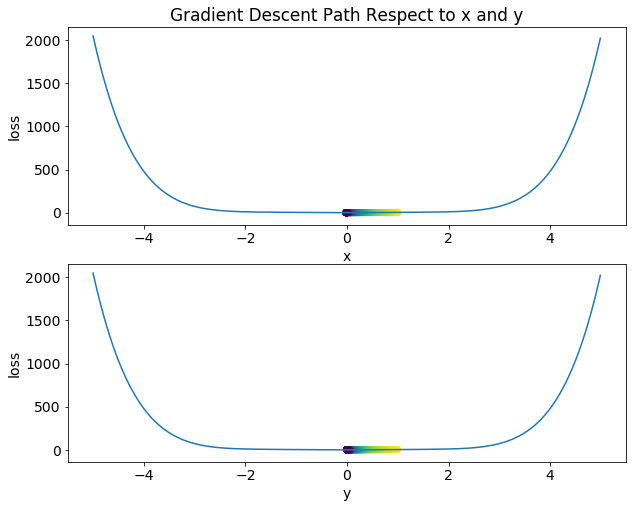

In [14]:
x_range = np.arange(-5, 5, 0.01)
y_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x_range,y_range)

font = {'size': 14}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x_range, z_range)
ax1.scatter(solver.x_path, solver.loss_path, color=colours)
ax1.set_title('Gradient Descent Path Respect to x and y')
ax1.set_xlabel('x')
ax1.set_ylabel('loss')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(y_range, z_range)
ax2.scatter(solver.y_path, solver.loss_path, color=colours)
ax2.set_xlabel('y')
ax2.set_ylabel('loss')


Text(0.5, 0.92, 'Gradient Descent Path 3D Plot')

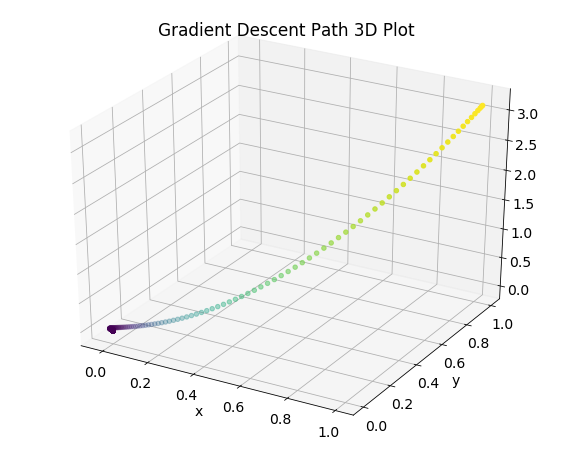

In [15]:
fig = plt.figure(figsize=(10, 8))
axl = plt.axes(projection='3d')
axl.scatter3D(solver.x_path, solver.y_path, solver.loss_path, color=colours)
axl.set_xlabel('x')
axl.set_ylabel('y')
axl.set_title('Gradient Descent Path 3D Plot')

**Nesterov's Accelarated Gradient**

Call the NAG method to find the minimum of the loss function

In [16]:
solver = gd_2d(fn_loss = fn_loss, fn_grad_x = fn_grad_x, fn_grad_y = fn_grad_y)
solver.nag(x_init = 1, y_init = 1, n_iter = 10000, eta = 0.001, tol = 1e-7, alpha = 0.9)

Converged in 774 steps.  Loss fn 3.882422970340178e-15 achieved by x = -2.708541456698109e-08,y = 6.451905990287696e-08


**Plot the path taken by Nesterov's Accelarated Gradient**

Text(0, 0.5, 'loss')

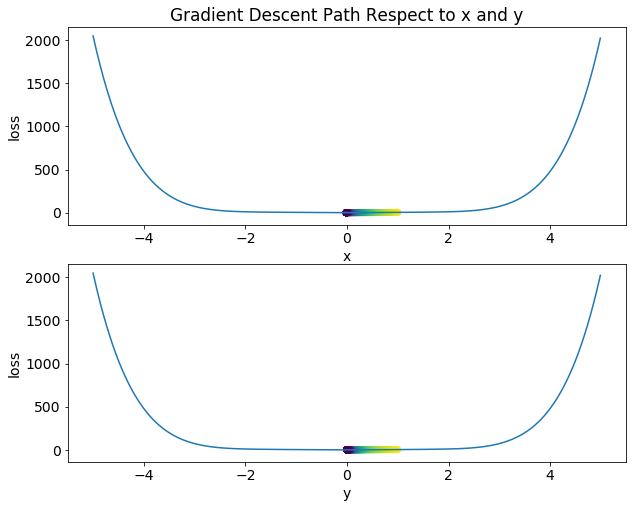

In [17]:
x_range = np.arange(-5, 5, 0.01)
y_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x_range,y_range)

font = {'size': 14}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x_range, z_range)
ax1.scatter(solver.x_path, solver.loss_path, color=colours)
ax1.set_title('Gradient Descent Path Respect to x and y')
ax1.set_xlabel('x')
ax1.set_ylabel('loss')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(y_range, z_range)
ax2.scatter(solver.y_path, solver.loss_path, color=colours)
ax2.set_xlabel('y')
ax2.set_ylabel('loss')

Text(0.5, 0.92, 'Gradient Descent Path 3D Plot')

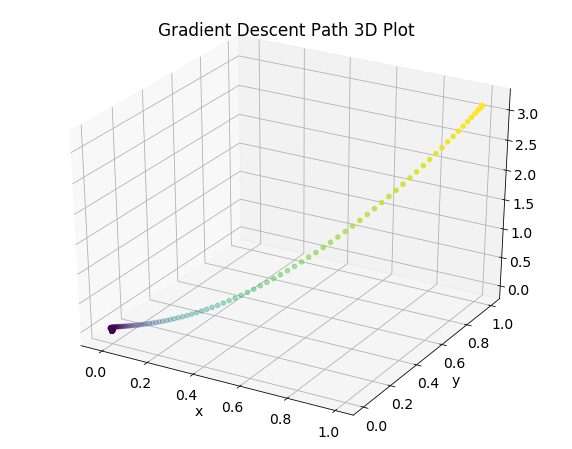

In [19]:
fig = plt.figure(figsize=(10, 8))
axl = plt.axes(projection='3d')
axl.scatter3D(solver.x_path, solver.y_path, solver.loss_path, color=colours)
axl.set_xlabel('x')
axl.set_ylabel('y')
axl.set_title('Gradient Descent Path 3D Plot')